# Lesson 2: Querying Knowledge Graphs with Cypher

<p style="background-color:#fd4a6180; padding:15px; margin-left:20px"> <b>Note:</b> This notebook takes about 30 seconds to be ready to use. Please wait until the "Kernel starting, please wait..." message clears from the top of the notebook before running any cells. You may start the video while you wait.</p>


### Import packages and set up Neo4

In [1]:
from dotenv import load_dotenv
import os

from langchain_community.graphs import Neo4jGraph

# Warning control
import warnings
warnings.filterwarnings("ignore")

In [2]:
load_dotenv('.env', override=True)
NEO4J_URI = os.getenv('NEO4J_URI')
NEO4J_USERNAME = os.getenv('NEO4J_USERNAME')
NEO4J_PASSWORD = os.getenv('NEO4J_PASSWORD')
NEO4J_DATABASE = os.getenv('NEO4J_DATABASE')

- Initialize a knowledge graph instance using LangChain's Neo4j integration

In [3]:
kg = Neo4jGraph(
    url=NEO4J_URI, username=NEO4J_USERNAME, password=NEO4J_PASSWORD, database=NEO4J_DATABASE
)

### Querying the movie knowledge graph 
- Match all nodes in the graph

- Mapping the Relationships
1. Person ---acted in--> Movies
(Person)-[Acted_IN]-->(Movies)

- Each Node has properties
1. Person
    * key: name, value: string
    * key: born, value: integer
2. Movie
    * key: title, value: string
    * key: tagline, value: string
    * key released, value: integer
    
- Other relationships that may exist

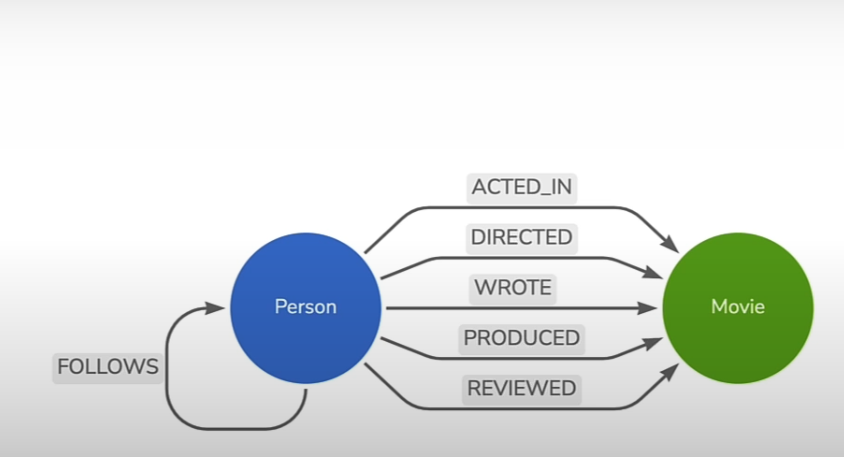

In [6]:
## Neo4j cypher query
## uses pattern matching to find patterns within the graph
## result should be how many nodes in graph

cypher = """
  MATCH (n) 
  RETURN count(n) AS numberOfNodes
  """

In [7]:
## run query using langchain
result = kg.query(cypher)
result

[{'numberOfNodes': 171}]

In [8]:
cypher = """
  MATCH (n) 
  RETURN count(n) AS numberOfNodes
  """

In [9]:
result = kg.query(cypher)
result

[{'numberOfNodes': 171}]

In [10]:
print(f"There are {result[0]['numberOfNodes']} nodes in this graph.")

There are 171 nodes in this graph.


- Match only the `Movie` nodes by specifying the node label

In [11]:
## now adding label for each node
cypher = """
  MATCH (n:Movie) 
  RETURN count(n) AS numberOfMovies
  """
kg.query(cypher)

[{'numberOfMovies': 38}]

- Change the variable name in the node pattern match for improved readability

In [12]:
## counting 'm' movies beging with letter 'm'
cypher = """
  MATCH (m:Movie) 
  RETURN count(m) AS numberOfMovies
  """
kg.query(cypher)

[{'numberOfMovies': 38}]

- Match only the `Person` nodes

In [13]:
# match pattern for people
cypher = """
  MATCH (people:Person) 
  RETURN count(people) AS numberOfPeople
  """
kg.query(cypher)

[{'numberOfPeople': 133}]

- Match a single person by specifying the value of the `name` property on the `Person` node

In [14]:
## specific query within Person node
cypher = """
  MATCH (tom:Person {name:"Tom Hanks"}) 
  RETURN tom
  """
kg.query(cypher)

[{'tom': {'born': 1956, 'name': 'Tom Hanks'}}]

- Match a single `Movie` by specifying the value of the `title` property

In [15]:
## match key/value within Movie node
cypher = """
  MATCH (cloudAtlas:Movie {title:"Cloud Atlas"}) 
  RETURN cloudAtlas
  """
kg.query(cypher)

[{'cloudAtlas': {'tagline': 'Everything is connected',
   'title': 'Cloud Atlas',
   'released': 2012}}]

- Return only the `released` property of the matched `Movie` node

In [16]:
## return cloudAtlas with ONLY released date
cypher = """
  MATCH (cloudAtlas:Movie {title:"Cloud Atlas"}) 
  RETURN cloudAtlas.released
  """
kg.query(cypher)

[{'cloudAtlas.released': 2012}]

- Return two properties

In [17]:
## return 2 specific values in nodes
cypher = """
  MATCH (cloudAtlas:Movie {title:"Cloud Atlas"}) 
  RETURN cloudAtlas.released, cloudAtlas.tagline
  """
kg.query(cypher)

[{'cloudAtlas.released': 2012,
  'cloudAtlas.tagline': 'Everything is connected'}]

### Cypher patterns with conditional matching

In [18]:
## conditional range matching -- similar to SQL query
cypher = """
  MATCH (nineties:Movie) 
  WHERE nineties.released >= 1990 
    AND nineties.released < 2000 
  RETURN nineties.title
  """


In [19]:
## langchain integration against DB
kg.query(cypher)

[{'nineties.title': 'The Matrix'},
 {'nineties.title': "The Devil's Advocate"},
 {'nineties.title': 'A Few Good Men'},
 {'nineties.title': 'As Good as It Gets'},
 {'nineties.title': 'What Dreams May Come'},
 {'nineties.title': 'Snow Falling on Cedars'},
 {'nineties.title': "You've Got Mail"},
 {'nineties.title': 'Sleepless in Seattle'},
 {'nineties.title': 'Joe Versus the Volcano'},
 {'nineties.title': 'When Harry Met Sally'},
 {'nineties.title': 'That Thing You Do'},
 {'nineties.title': 'The Birdcage'},
 {'nineties.title': 'Unforgiven'},
 {'nineties.title': 'Johnny Mnemonic'},
 {'nineties.title': 'The Green Mile'},
 {'nineties.title': 'Hoffa'},
 {'nineties.title': 'Apollo 13'},
 {'nineties.title': 'Twister'},
 {'nineties.title': 'Bicentennial Man'},
 {'nineties.title': 'A League of Their Own'}]

### Pattern matching with multiple nodes

In [20]:
## new cypher pattern query
cypher = """
  MATCH (actor:Person)-[:ACTED_IN]->(movie:Movie) 
  RETURN actor.name, movie.title LIMIT 10
  """
kg.query(cypher)

[{'actor.name': 'Emil Eifrem', 'movie.title': 'The Matrix'},
 {'actor.name': 'Hugo Weaving', 'movie.title': 'The Matrix'},
 {'actor.name': 'Laurence Fishburne', 'movie.title': 'The Matrix'},
 {'actor.name': 'Carrie-Anne Moss', 'movie.title': 'The Matrix'},
 {'actor.name': 'Keanu Reeves', 'movie.title': 'The Matrix'},
 {'actor.name': 'Hugo Weaving', 'movie.title': 'The Matrix Reloaded'},
 {'actor.name': 'Laurence Fishburne', 'movie.title': 'The Matrix Reloaded'},
 {'actor.name': 'Carrie-Anne Moss', 'movie.title': 'The Matrix Reloaded'},
 {'actor.name': 'Keanu Reeves', 'movie.title': 'The Matrix Reloaded'},
 {'actor.name': 'Hugo Weaving', 'movie.title': 'The Matrix Revolutions'}]

In [21]:
cypher = """
  MATCH (tom:Person {name: "Tom Hanks"})-[:ACTED_IN]->(tomHanksMovies:Movie) 
  RETURN tom.name,tomHanksMovies.title
  """
kg.query(cypher)

[{'tom.name': 'Tom Hanks', 'tomHanksMovies.title': 'Apollo 13'},
 {'tom.name': 'Tom Hanks', 'tomHanksMovies.title': "You've Got Mail"},
 {'tom.name': 'Tom Hanks', 'tomHanksMovies.title': 'A League of Their Own'},
 {'tom.name': 'Tom Hanks', 'tomHanksMovies.title': 'Joe Versus the Volcano'},
 {'tom.name': 'Tom Hanks', 'tomHanksMovies.title': 'That Thing You Do'},
 {'tom.name': 'Tom Hanks', 'tomHanksMovies.title': 'The Da Vinci Code'},
 {'tom.name': 'Tom Hanks', 'tomHanksMovies.title': 'Cloud Atlas'},
 {'tom.name': 'Tom Hanks', 'tomHanksMovies.title': 'Cast Away'},
 {'tom.name': 'Tom Hanks', 'tomHanksMovies.title': 'The Green Mile'},
 {'tom.name': 'Tom Hanks', 'tomHanksMovies.title': 'Sleepless in Seattle'},
 {'tom.name': 'Tom Hanks', 'tomHanksMovies.title': 'The Polar Express'},
 {'tom.name': 'Tom Hanks', 'tomHanksMovies.title': "Charlie Wilson's War"}]

In [23]:
# extend pattern --> other people in movie
cypher = """
  MATCH (tom:Person {name:"Tom Hanks"})-[:ACTED_IN]->(m)<-[:ACTED_IN]-(coActors) 
  RETURN coActors.name, m.title
  """
kg.query(cypher)

[{'coActors.name': 'Ed Harris', 'm.title': 'Apollo 13'},
 {'coActors.name': 'Gary Sinise', 'm.title': 'Apollo 13'},
 {'coActors.name': 'Kevin Bacon', 'm.title': 'Apollo 13'},
 {'coActors.name': 'Bill Paxton', 'm.title': 'Apollo 13'},
 {'coActors.name': 'Parker Posey', 'm.title': "You've Got Mail"},
 {'coActors.name': 'Greg Kinnear', 'm.title': "You've Got Mail"},
 {'coActors.name': 'Meg Ryan', 'm.title': "You've Got Mail"},
 {'coActors.name': 'Steve Zahn', 'm.title': "You've Got Mail"},
 {'coActors.name': 'Dave Chappelle', 'm.title': "You've Got Mail"},
 {'coActors.name': 'Madonna', 'm.title': 'A League of Their Own'},
 {'coActors.name': "Rosie O'Donnell", 'm.title': 'A League of Their Own'},
 {'coActors.name': 'Geena Davis', 'm.title': 'A League of Their Own'},
 {'coActors.name': 'Bill Paxton', 'm.title': 'A League of Their Own'},
 {'coActors.name': 'Lori Petty', 'm.title': 'A League of Their Own'},
 {'coActors.name': 'Nathan Lane', 'm.title': 'Joe Versus the Volcano'},
 {'coActors.na

### Delete data from the graph

In [24]:
## Emil Eifrem is found of neo4j -- delete him
cypher = """
MATCH (emil:Person {name:"Emil Eifrem"})-[actedIn:ACTED_IN]->(movie:Movie)
RETURN emil.name, movie.title
"""
kg.query(cypher)

[{'emil.name': 'Emil Eifrem', 'movie.title': 'The Matrix'}]

In [25]:
# remove acted in relationship
# delete clause to delete
cypher = """
MATCH (emil:Person {name:"Emil Eifrem"})-[actedIn:ACTED_IN]->(movie:Movie)
DELETE actedIn
"""
kg.query(cypher)

[]

In [26]:
## verify he was deleted from database
cypher = """
MATCH (emil:Person {name:"Emil Eifrem"})-[actedIn:ACTED_IN]->(movie:Movie)
RETURN emil.name, movie.title
"""
kg.query(cypher)

[]

### Adding data to the graph - creating data

In [27]:
# create a node
cypher = """
CREATE (andreas:Person {name:"Andreas"})
RETURN andreas
"""

kg.query(cypher)

[{'andreas': {'name': 'Andreas'}}]

In [28]:
# create relationships in the KG
# relationship between Andreas and Emil
cypher = """
MATCH (andreas:Person {name:"Andreas"}), (emil:Person {name:"Emil Eifrem"})
MERGE (andreas)-[hasRelationship:WORKS_WITH]->(emil)
RETURN andreas, hasRelationship, emil
"""

kg.query(cypher)

[{'andreas': {'name': 'Andreas'},
  'hasRelationship': ({'name': 'Andreas'},
   'WORKS_WITH',
   {'born': 1978, 'name': 'Emil Eifrem'}),
  'emil': {'born': 1978, 'name': 'Emil Eifrem'}}]